# Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться);

2. CustomerId — идентификатор клиента;

3. Surname — фамилия клиента;

4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);

5. Geography — страна клиента (банк международный);

6. Gender — пол клиента;

7. Age — возраст клиента;

8. Tenure — сколько лет клиент пользуется услугами банка;

9. Balance — баланс на счетах клиента в банке;

10. NumOfProducts — количество услуг банка, которые приобрёл клиент;

11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);

12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет);

13. EstimatedSalary — предполагаемая заработная плата клиента;

14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент);

In [27]:
#Импорт библиотек
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
churn_data = pd.read_csv('data/churn.csv', sep=',')
display(churn_data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Задача 9.1. 

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Cоотношение ушедших и лояльных клиентов')

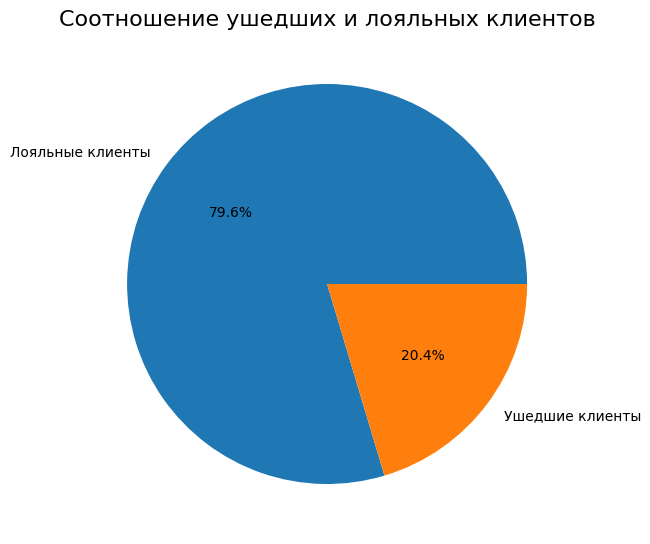

In [28]:
#Высчитываем количество переменных '0' - лояльных и '1' - ушедших
churn_exited = churn_data['Exited'].value_counts()

#Создаём Пустую диаграмму
fig = plt.figure(figsize=(5, 5))

#Натраиваем масштаб нашей диаграммы
axes = fig.add_axes([0, 0, 1, 1])

#Создаём круговую диаграмму
axes.pie(
    churn_exited,
    labels = ['Лояльные клиенты', 'Ушедшие клиенты'], #Задаём название долей лояльных и ушедших
    autopct='%.1f%%',
);
axes.set_title('Cоотношение ушедших и лояльных клиентов', fontsize=16)

#Вывод - соотношение лояльных и ушедших клиентов 79.6/20.4 [%], что означает - приблизительно каждый пятый клиент является ушедшим.

# Задача 9.2. 

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [15]:
#Создаём переменную, которая оставляет только клиентов с балансом больше 2500 тыс.
churn_balance = churn_data[churn_data['Balance'] > 2500]

#Создаём Plotly гистограмму по соотношению баланса на счету (X) и количества человек (Y)
fig = px.histogram(
    churn_balance,
    title = 'Распределение баланса клиентов',
    x = 'Balance',
    nbins = 30,
    height = 800,
    width = 1000,
)

#Для пояснения, переименовываем название осей
fig.update_xaxes(title_text = 'Баланс на счету клиента')
fig.update_yaxes(title_text = 'Количество человек')
fig.show()

#Вывод: Макимальное количество клиентов имеет баланс на счету 120-130 тыс. Максиальный баланс у клиента 250-260 тыс.

# Задача 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [29]:
#Создаём Plotly гистограмму по соотношению баланса на счету (X) и количества человек (Y)
fig = px.histogram(
    churn_balance,
    title = 'Распределение баланса клиентов',
    x = 'Balance',
    color = 'Exited', #Добавляем цветовой параметр по столбцу Exited
    nbins = 30,
    height = 800,
    width = 1000,
)

#Для пояснения, переименовываем название осей
fig.update_xaxes(title_text = 'Баланс на счету клиента')
fig.update_yaxes(title_text = 'Количество человек')
fig.show()

#Вывод: Среди ушедших клиентов присутствуют клиенты с разным балансом на счету. соотношение ушедших и лояльных колиентов по признаку баланса на счету примерно 1/4-1/5 

# Задача 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

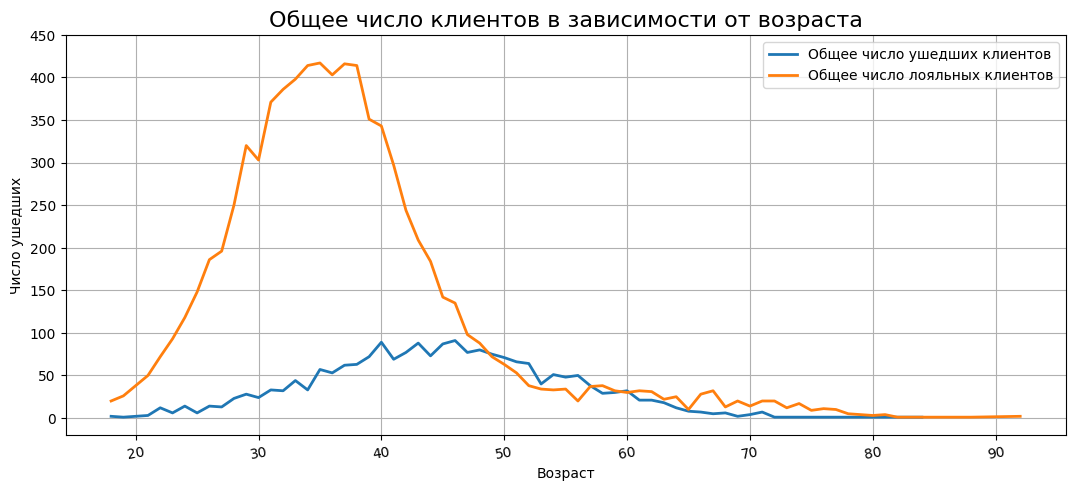

In [37]:
#Создаём переменные по признаку 'Exited': age_data_1 - данные по ушедшим, age_data_0 - данные по лояльным
age_data_1 = churn_data[churn_data['Exited'] == 1]
age_data_0 = churn_data[churn_data['Exited'] == 0]

#Группируем по признаку "Age" c с подсчётом количества клиентов по признаку 'Exited'
age_grouped_1 = age_data_1.groupby(['Age'])[['Exited']].count()
age_grouped_0 = age_data_0.groupby(['Age'])[['Exited']].count()

#визуализация графиков через Matplotlib
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(age_grouped_1['Exited'], label='Общее число ушедших клиентов', lw=2)
axes.plot(age_grouped_0['Exited'], label='Общее число лояльных клиентов', lw=2)

#Eстановка параметров отображения
axes.set_title('Общее число клиентов в зависимости от возраста', fontsize=16)
axes.set_xlabel('Возраст')
axes.set_ylabel('Число ушедших')
axes.set_yticks(range(0, 500, 50))
axes.xaxis.set_tick_params(rotation=10)
axes.grid()
axes.legend();

#Вывод: Доля ушедших клиентов достикает максимума в возрасте 40-50 лет, доля лояльных достигает максимума в возрасте 30-40 лет.

# Задача 9.5
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [17]:
#Для удобства переименуем переменные в столбце 'Exited' на Лояльные и Ушедшие
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')

In [18]:
#Взуализируем Plotly график рассеивания Лояльных и Ушедших в зависимост и от дохода.

fig = px.scatter(
    churn_data,
    x='EstimatedSalary', 
    y='CreditScore',
    color = 'Exited',

)
fig.show()

#Вывод: На графике рассеивания явной взаимосвязи лояльности/дохода не обнаружено

# Задача 9.6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [45]:
#Повторный импорт для восстановления столбца "Exited"
churn_data = pd.read_csv('data/churn.csv', sep=',')

#Создаём сводную таблицу, высчитывающую среднюю по ушедшим (это будет наш коэффициент лояльности - чем он ниже, тем пол клиента лояльнее) в зависимости от гендера
churn_gender = churn_data.pivot_table(
    values='Exited',
    index = 'Gender',
    aggfunc='mean',
    )
churn_gender.reset_index(inplace = True) #Изьавляемся от индекса

#Визуализируем данные
fig = px.bar(
    churn_gender,
    x='Gender',
    y='Exited',
    color = 'Gender',
    title = 'Сравнительная диаграмма ушедших клентов по половому прзнаку'
)

#Переименовываем оси
fig.update_yaxes(title_text = 'Коэффициент ушедших')
fig.update_xaxes(title_text = 'Пол')
fig.show()

#Вывод: среди ушедших клиентов доля женщин больше

# Задача 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [48]:
#Для удобства переименуем переменные в столбце 'Exited' на Лояльные и Ушедшие
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')

<Axes: title={'center': 'Диаграмма зависимости оттока клиентов от количества использования услуг'}, xlabel='NumOfProducts'>

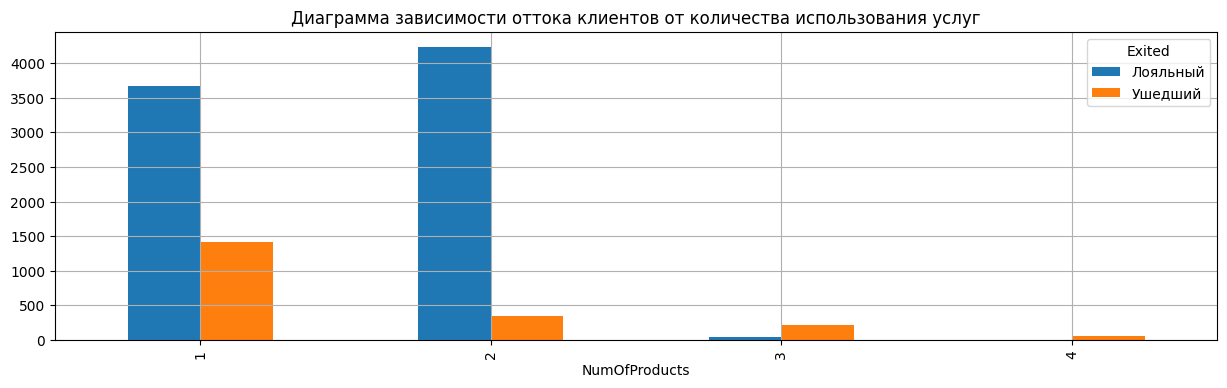

In [49]:
# Создаём сводную таблицу по количеству услуг и доле ушедших/лояльных

exited = churn_data.pivot_table(
    values = 'RowNumber',
    index = 'NumOfProducts',
    columns = 'Exited',
    aggfunc='count'
)

#Визуализируем данные
exited.plot(kind='bar', grid=True, figsize=(15, 4), title = 'Диаграмма зависимости оттока клиентов от количества использования услуг')

#Вывод:Доля ушедших больше у клиентов, приобретавших 3-4 услуги банка. при этом основная масса клиентов приобретала 1-2 услуги у банка. 
#Среди основной массы клиентов доля ушедших больше у клиентов, приобретавших 1 услугу.

# Задача 9.7

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [91]:
#Для удобства переименуем переменные в столбце 'IsActiveMember' на Активный и Неактивный
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный')

<Axes: title={'center': 'Диаграмма зависимости оттока клиентов от статуса активного клиента'}, xlabel='IsActiveMember'>

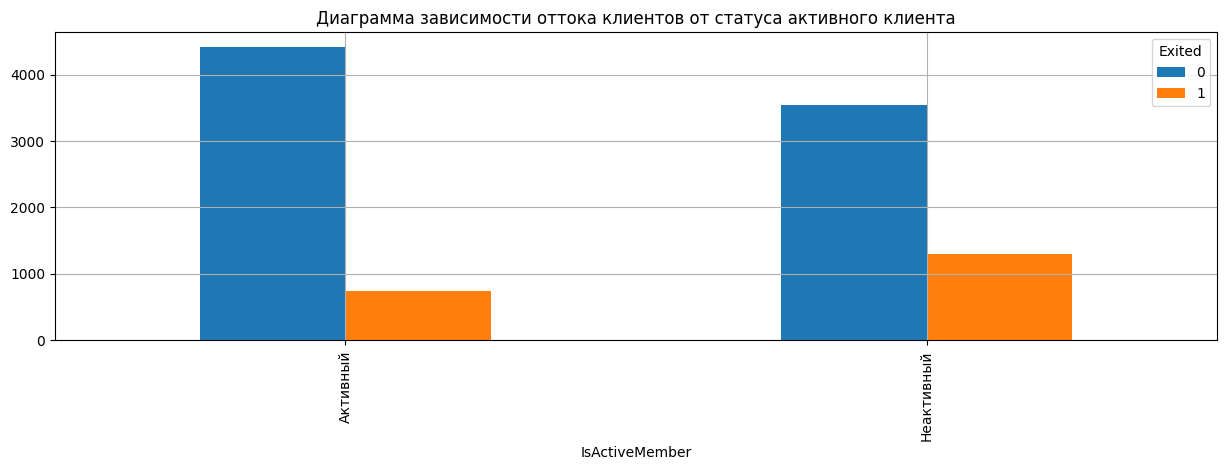

In [92]:
exited = churn_data.pivot_table(
    values = 'RowNumber',
    index = 'IsActiveMember',
    columns = 'Exited',
    aggfunc='count'
)

#Визуализируем данные
exited.plot(kind='bar', grid=True, figsize=(15, 4), title = 'Диаграмма зависимости оттока клиентов от статуса активного клиента')

# Задача 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
#Повторный импорт для восстановления столбца "Exited"
churn_data = pd.read_csv('data/churn.csv', sep=',')

In [79]:
#Создаём сводную таблицу по странам и доле ушедших (через средний коэффициент), считаем количество
countries = churn_data.pivot_table(
    values = 'Exited',
    index = 'Geography',
    aggfunc='mean'
)

#Убираем индексы
countries.reset_index(inplace=True)

#Визуализируем данные
fig = px.choropleth(
    data_frame = countries, #DataFrame
    locations="Geography", #Столбец со странами
    locationmode = "country names", #Режим сопоставления локаций с базой Plotly
    color="Exited", #Цвет по кол-ву ушедших
    range_color=[0,1] #диапазон цвета
)

fig.show()

#Вывод: Среди клиентов, доля ушедших в Германии - наибольшая. Возможно,это связано с большей окнкуренцией в Германии.

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


# Задача 9.10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [93]:
#Функция формирования статуса клиента в зависимости от кредитного рейтинга
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


In [94]:
#Применим функцию к нашей базе данных
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

#Создадим сводную таблицу в зависимости от статуса клиента и стажа пользования банком, с выводом средней по оттоку.
experience = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure',
)

#Визуализируем список через тепловую карту
fig = px.imshow(
    experience,
    title='Тепловая карта оттока в зависимости от статуса и стажа клиента',
)

#Настрйока осей
fig.update_yaxes(title_text = 'Статус клиента')
fig.update_xaxes(title_text = 'Стаж пользования банком, [лет]')
fig.show()

#Вывод: На тепловой карте видная явная зависимость коэффициента оттока от статуса клиента - наиболее частая аудитория Уходящих имеет низкий статус (кредитный рейтинг).